In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
stocks = pd.read_csv('../data/SP100/stocks.csv').set_index('Symbol')
stocks.head(n=10)

,Name,Sector
Symbol,,
AAPL,Apple Inc.,Information Technology
ABBV,AbbVie,Health Care
ABT,Abbott Laboratories,Health Care
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
AIG,American International Group,Financials
AMD,Advanced Micro Devices,Information Technology
AMGN,Amgen,Health Care
AMT,American Tower,Real Estate


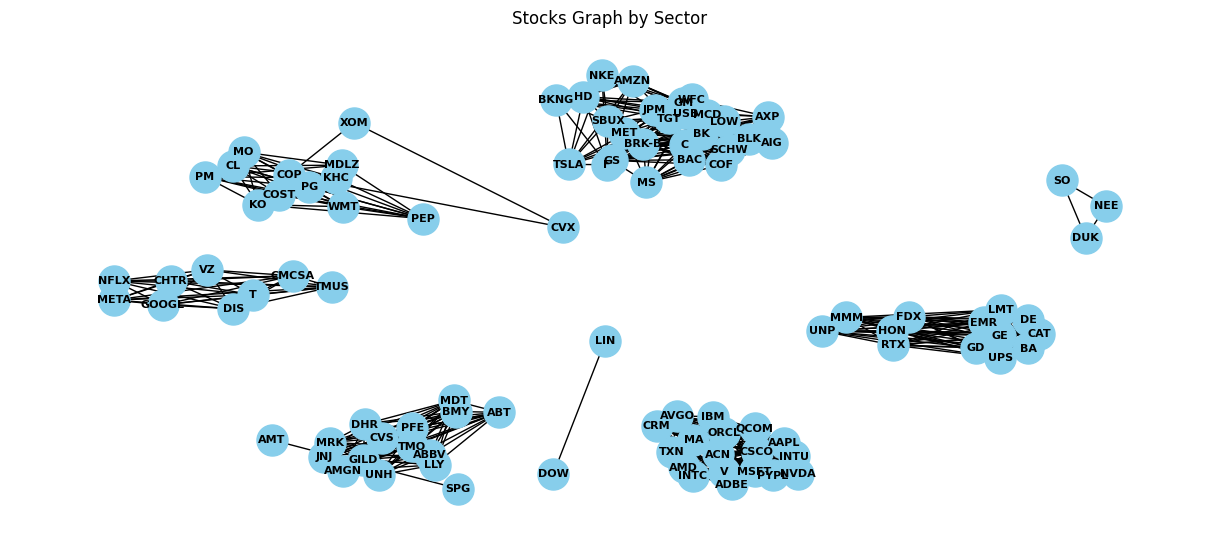

In [3]:
# Stocks by sector
adj_stocks = np.array([
	[stocks.loc[stock1, 'Sector'] == stocks.loc[stock2, 'Sector'] * (stock1 != stock2) for stock1 in stocks.index] for stock2 in stocks.index
]).astype(int)
stocks_graph = nx.from_numpy_array(adj_stocks)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(stocks_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(stocks_graph, k=.5))
plt.title('Stocks Graph by Sector')
plt.show()

### Graph by Fundamentals Correlation

In [4]:
fundamentals = pd.read_csv('../data/SP100/fundamentals.csv').set_index("Symbol")
fundamentals.head(n=10)

,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,4.948845,-0.002271,0.075142,2.298179,-0.218128,-0.209777,-0.100824,-0.212221,0.713554,-1.017199,-0.078923,1.259397,0.847150,0.653144
ABBV,-0.105859,0.203262,-0.227032,1.738996,-0.412155,-0.033784,-0.100832,0.372456,-0.923289,1.050662,-0.248025,-0.259000,0.315835,-0.484589
ABT,-0.272848,-0.049996,-0.066183,-0.274917,-0.387295,-0.354902,-0.100385,-0.065571,-0.638734,-0.410391,-0.474015,-0.284587,-0.012415,-0.116685
ACN,-0.237594,-0.087082,-0.003711,-0.150384,0.107473,0.055594,-0.099875,-0.126416,0.726606,-0.581240,-0.590417,-0.377597,-0.319320,-0.332536
ADBE,-0.218096,0.051665,0.011610,0.218550,0.128694,0.354138,-0.100163,-0.259950,0.867579,-1.311766,-1.150161,-0.359398,1.169054,0.777887
AIG,-0.502088,-0.243258,-0.288835,-0.446202,-0.281793,-0.283492,-0.099276,-0.170474,0.267142,0.161069,-0.338587,-0.323263,-0.798138,-1.572254
AMD,-0.230503,0.829017,0.039236,-0.319107,-0.518870,-0.357667,-0.100107,-0.259950,1.930090,-1.382463,-0.453383,0.745396,0.845419,-0.616275
AMGN,-0.351368,-0.048945,-0.250970,0.357027,-0.112626,0.359666,-0.100590,0.075839,-0.959837,0.367266,-0.731784,-0.367983,0.201996,-0.193058
AMT,-0.427316,0.096812,0.098451,0.663349,-0.335151,-0.279806,-0.100732,0.208070,-0.325463,0.043242,-0.850309,-0.383106,1.530571,-0.429121


In [5]:
def get_clusters(data: np.ndarray, n_clusters: int) -> np.ndarray:
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit(data).labels_

In [6]:
fundamentals_corr = fundamentals.transpose().corr(method="spearman")
fundamentals_corr = (fundamentals_corr - (fundamentals_corr == 1))  # Remove self-correlation
fundamentals_corr.head(n=10)

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,-0.138462,0.178022,-0.160440,0.305495,-0.608791,0.512088,-0.393407,-0.041758,0.617582,...,-0.024176,-0.270330,-0.195604,-0.564835,-0.371429,0.472527,-0.265934,-0.129670,0.226374,-0.274725
ABBV,-0.138462,0.000000,0.393407,-0.204396,-0.186813,0.063736,-0.085714,0.828571,0.745055,-0.318681,...,0.120879,0.195604,-0.147253,0.239560,-0.213187,-0.156044,0.507692,-0.490110,0.072527,-0.028571
ABT,0.178022,0.393407,0.000000,0.019780,0.195604,-0.283516,0.380220,0.292308,0.573626,-0.046154,...,0.309890,0.164835,0.050549,-0.221978,-0.235165,0.265934,0.239560,-0.454945,0.094505,-0.336264
ACN,-0.160440,-0.204396,0.019780,0.000000,0.516484,0.454945,0.336264,-0.015385,0.230769,-0.041758,...,-0.191209,0.432967,0.349451,0.498901,-0.353846,0.208791,-0.208791,-0.406593,-0.248352,0.024176
ADBE,0.305495,-0.186813,0.195604,0.516484,0.000000,-0.243956,0.318681,0.085714,0.235165,-0.235165,...,0.270330,-0.156044,0.736264,-0.098901,-0.230769,0.762637,-0.696703,-0.437363,-0.613187,-0.621978
AIG,-0.608791,0.063736,-0.283516,0.454945,-0.243956,0.000000,0.112088,0.098901,0.173626,-0.120879,...,-0.037363,0.112088,0.059341,0.912088,0.371429,-0.674725,0.367033,0.213187,-0.226374,0.538462
AMD,0.512088,-0.085714,0.380220,0.336264,0.318681,0.112088,0.000000,-0.323077,0.340659,0.600000,...,0.081319,-0.125275,-0.076923,-0.006593,-0.164835,0.006593,-0.032967,-0.217582,0.054945,-0.120879
AMGN,-0.393407,0.828571,0.292308,-0.015385,0.085714,0.098901,-0.323077,0.000000,0.648352,-0.745055,...,0.147253,0.248352,0.287912,0.353846,-0.151648,0.024176,0.362637,-0.547253,-0.323077,-0.063736
AMT,-0.041758,0.745055,0.573626,0.230769,0.235165,0.173626,0.340659,0.648352,0.000000,-0.274725,...,0.410989,0.024176,0.169231,0.340659,-0.217582,0.006593,0.257143,-0.665934,-0.178022,-0.239560


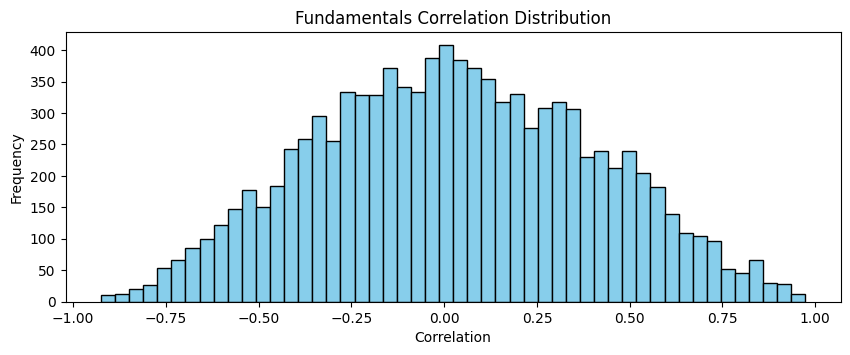

In [7]:
plt.figure(figsize=(10, 3.5))
plt.hist(fundamentals_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

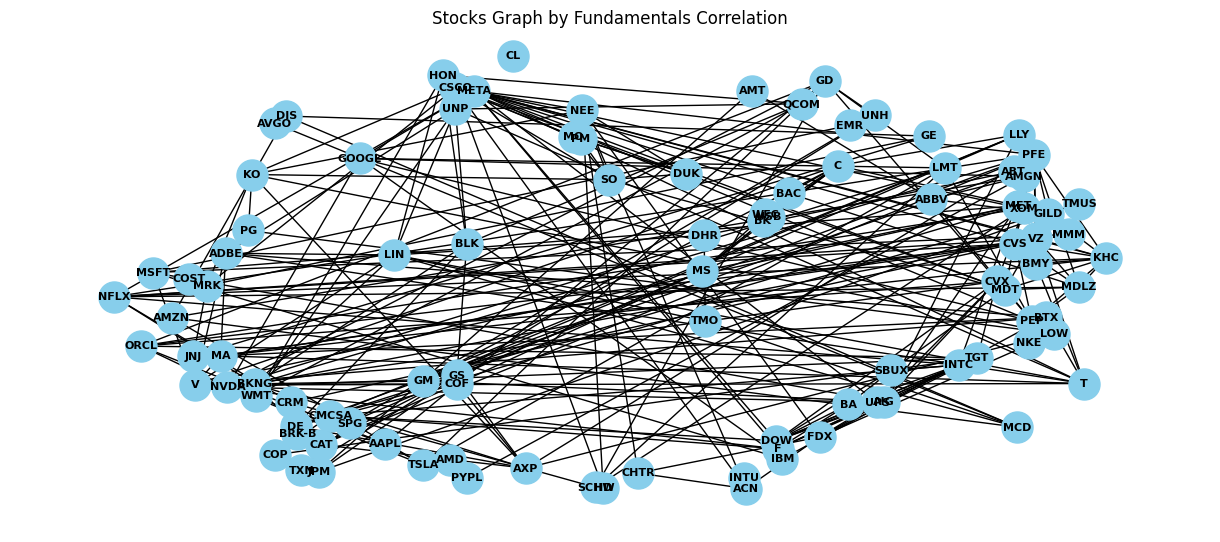

In [8]:
fundamentals_corr_np = fundamentals_corr.to_numpy()
adj_fundamentals_corr = (fundamentals_corr_np * (abs(fundamentals_corr_np) > .7).astype(int))

fundamentals_corr_graph = nx.from_numpy_array(adj_fundamentals_corr)
fundamentals_corr_graph = nx.relabel_nodes(fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(12, 5))
nx.draw(fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

### Merging the Graph

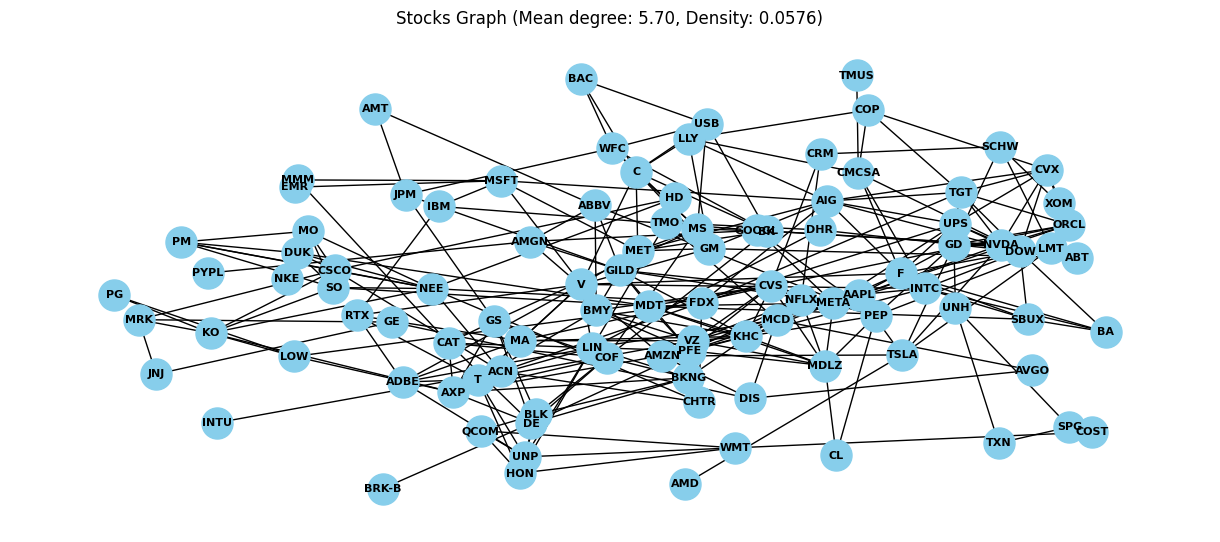

In [9]:
corr_threshold, sector_bonus = .7, .05

share_sector = pd.get_dummies(stocks[["Sector"]]).transpose().corr().to_numpy().astype(int) - np.eye(len(stocks), dtype=int)
# abs because GCNConv only accepts positive weights
adj = abs(fundamentals_corr_np) + share_sector * sector_bonus
adj = adj * (abs(adj) > corr_threshold)  
adj = adj / adj.max()

graph = nx.from_numpy_array(adj)
graph = nx.relabel_nodes(graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(graph, k=.5))
plt.title(f'Stocks Graph (Mean degree: {np.mean([degree for node, degree in graph.degree]):.2f}, Density: {nx.density(graph):.4f})')
plt.show()